In [1]:
%matplotlib inline
import sympy
import numpy as np
from numpy.linalg import *
import matplotlib.pyplot as plt
from sympy.plotting import plot, plot3d, PlotGrid
from sympy import solve, Poly, Eq, Function, exp
from sympy import symbols, Matrix, Transpose
from sympy import *
from sympy.vector import CoordSys3D, gradient
from mpl_toolkits.mplot3d import Axes3D
from sympy import lambdify
import sympy.core.function
from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt
from sympy_lib import *

In [5]:
x1,x2 = symbols('x1,x2')

#objective function
obj_func = (1-x1)**2 + 100*(x2-x1**2)**2
eps = 0.01

x0 =np.array([0 ,1])
x_path= []
x =x0
x_path.append(x)
variables = list(ordered(obj_func.free_symbols))
Gradient = simplify(derive_by_array(obj_func, variables))
Hessian = simplify(derive_by_array(derive_by_array(obj_func, variables), variables))
Gradient = Gradient.subs(zip(variables,x))
Hessian = Hessian.subs(zip(variables,x))
Gradient = np.array(Gradient).astype(np.float64)
Hessian = np.array(Hessian).astype(np.float64)


d = -1*inv(Hessian).dot(Gradient)
x_prev = x0
x = x + d
x_path.append(x)
while np.abs(norm(x) - norm(x_prev)) >= eps:
    variables = list(ordered(obj_func.free_symbols))
    Gradient = simplify(derive_by_array(obj_func, variables))
    Hessian = simplify(derive_by_array(derive_by_array(obj_func, variables), variables))
    Gradient = Gradient.subs(zip(variables,x))
    Hessian = Hessian.subs(zip(variables,x))
    Gradient = np.array(Gradient).astype(np.float64)
    Hessian = np.array(Hessian).astype(np.float64)  

    d = -1*inv(Hessian).dot(Gradient)
    x_prev = x
    x = x + d
    x_path.append(x)

print(x)

[1. 1.]


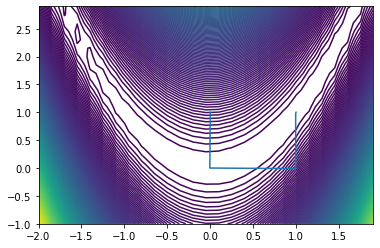

In [13]:
x = []
y = []
for i in x_path:
    x.append(i[0])
    y.append(i[1])

plt.plot(x,y)
f = lambdify((x1, x2), obj_func,"numpy")
a = np.arange(-2,2, 0.15)
b = np.arange(-1,3, 0.15)
x, y = np.meshgrid(a, b)
plt.contour(x,y,f(x,y),300)



In [15]:
def newton(function,x0,epsilon):
    grad = get_gradient(function,x0)
    hess = get_hessian(function,x0)
    d = -1*inv(hess).dot(grad)
    x = x0 + d

    while np.abs(norm(x) - norm(x_prev)) >= eps:
        grad = get_gradient(function,x)
        hess = get_hessian(function,x)
        d = -1*inv(hess).dot(grad)
        x = x0 + d

    return x

In [3]:
def steepest_descent(function,x0,epsilion):
    grad = get_gradient(function,x0)
    x = x0 - 0.01*grad
    while np.abs(norm(x) - norm(x_prev)) >= eps:
        grad = get_gradient(function,x0)
        x = x0 - 0.01*grad

    return x


In [4]:
eps = 0.2
x0 = [0,0]
steepest_descent(obj_func,x0,eps)

NameError: name 'obj_func' is not defined